In [1]:
from os import listdir
from glob import glob
import torch
from torch.utils.data import Dataset
import logging
import nibabel as nib
import numpy as np
from torchvision import transforms
from utils.data import PatientImage, PatientSegmentation, InterpolatedMultichannelImage
from utils.misc import gridRows
import matplotlib.pyplot as plt

In [2]:
imgs_dir = "/Data/ContijochLab/projects/autoseg/train/img"
segs_dir = "/Data/ContijochLab/projects/autoseg/train/seg"
ids = [file.replace('.nii.gz','') for file in listdir(imgs_dir)
                    if file.endswith('.nii.gz')]

patInd = 0
img = PatientImage(imgs_dir + "/" + ids[patInd]+".nii.gz")
seg = PatientSegmentation(segs_dir + "/" + ids[patInd]+".nii.gz")

In [3]:
# Ncrop = 4
# fig,ax = plt.subplots(1,Ncrop+1)
# fig.set_figwidth(20)
# fig.set_figheight(14)


# xc,yc = img.imageCenter()
# x,y = img.coordinates()
# x,y = np.meshgrid(x,y)
# I = img.imageData()
# ax[0].imshow(I,vmin=-500,vmax=500,cmap='gray')

# D = 350
# N = 512
# SIGMA = 50
# for n in np.arange(Ncrop):
#     xcc = xc + SIGMA*np.random.randn()
#     ycc = yc + SIGMA*np.random.randn()
#     Ii = img.cropImage(xcc,ycc,D,N)
#     ax[n+1].imshow(Ii,vmin=-500,vmax=500,cmap='gray')


In [4]:
# cs = seg.classes()
# print(cs)
# Sm = seg.multicomponentData()
# print(Sm.shape)
# fig,ax = plt.subplots(1,len(cs))
# fig.set_figwidth(20)
# fig.set_figheight(14)
# for ind,cls in enumerate(cs):
#     ax[ind].imshow(np.squeeze(Sm[:,:,ind]))

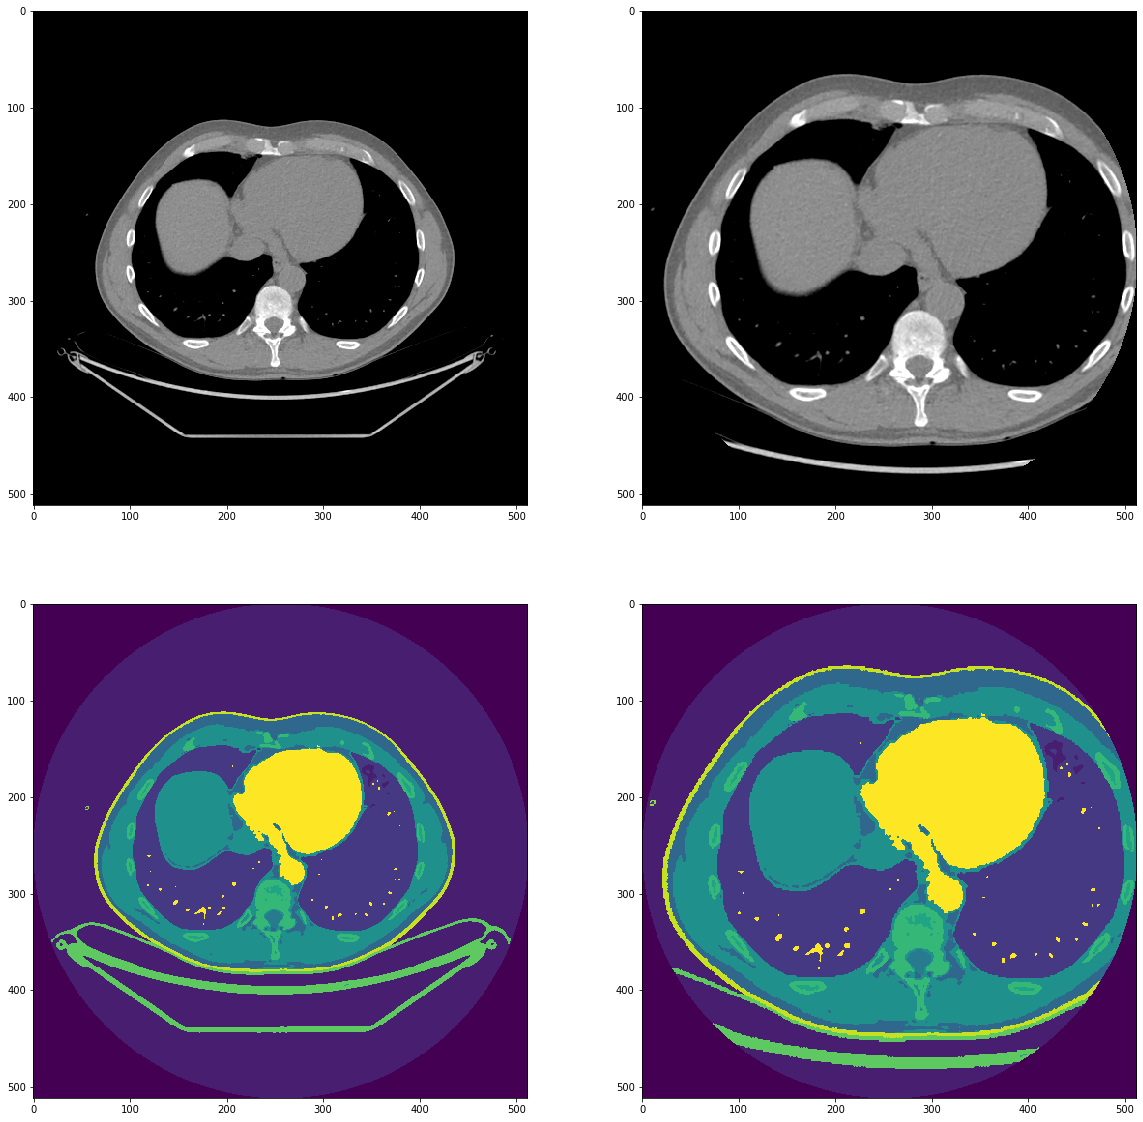

In [6]:
# x,y = img.coordinates()
x0,y0 = img.imageCenter()
# dx = x[0]-x[1]
# dy = y[0]-y[1]
# print("dx: " + str(dx))
# print("dy: " + str(dy))
# mci = InterpolatedMultichannelImage(I,dx=dx,dy=dy,x0=x0,y0=y0)
# mcs = InterpolatedMultichannelImage(Sc,dx=dx,dy=dy,x0=x0,y0=y0)
# print("Image")
# print("Size:     " + str(mci.size()))
# print("Channels: " + str(mci.numChannels()))

# print("Segmentation")
# print("Size:     " + str(mcs.size()))
# print("Channels: " + str(mcs.numChannels()))

D = 350
N = 512
SG = 50
xc = x0+SG*np.random.randn()
yc = y0+SG*np.random.randn()
I  = img.crop(x0,y0,500,512)
S  = seg.crop(x0,y0,500,512)
Ir = img.crop(xc,yc,D,N)
Sr = seg.crop(xc,yc,D,N)
fig,ax = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(20)
ax[0,0].imshow(I,vmin=-500,vmax=500,cmap='gray')
ax[0,1].imshow(Ir,vmin=-500,vmax=500,cmap='gray')
ax[1,0].imshow(S,vmin=0,vmax=len(seg.classes()))
ax[1,1].imshow(Sr,vmin=0,vmax=len(seg.classes()))

In [8]:
4//3

1